# Set up & Authentication

In [1]:
%pip install kaggle
%pip install pydicom
%pip install textstat
%pip install kagglehub
!pip install transformers torch tqdm
!pip install langdetect vaderSentiment torchvision Pillow textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom
from tqdm import tqdm
import os
import torch
from transformers import AutoModel, AutoTokenizer
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin
import kagglehub

## Authetication for Kaggle
To use the Kaggle API,   
* Sign up for a Kaggle account at https://www.kaggle.com.   

* Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'.   
  
* This will trigger the download of kaggle.json, a file containing your API credentials.   
  
* Login interface below just needs your username and token

In [ ]:
import kagglehub
# Authenticate - Requires API Keys
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


## Alt Method (Requires mounting and uploading of Kaggle.json)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


## Download dataset (Will be loaded to cache, mount on drive if you need to save changes to input data)

In [6]:
# Download latest version
path = kagglehub.dataset_download("siruitan/fakenewsproject")
print("Path to dataset files:", path)

100%|██████████| 2.07G/2.07G [01:36<00:00, 23.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/siruitan/fakenewsproject/versions/12


## Checking Data

In [8]:
main_df = pd.read_csv("..//root/.cache/kagglehub/datasets/siruitan/fakenewsproject/versions/12/full_df_translated.csv")
display(main_df.head())
print(main_df.columns)

,domain,title,text,publish_date,image_path,score,label,translated_text,translation_status,translation_timestamp
0,weibo.com,NaN,震惊，转发求证：【想都不敢想 ，在美国一桶金龙鱼食用油只要8元人民币】 一桶食用油相当于中国...,2012-11-13 16:55,a71ac854gw1dytin2zmk9j.jpg,0,1,"Shocked, forwarded for verification: [I dare n...",success,2025-04-13 00:04:48
1,weibo.com,NaN,【法院无底线】湖南长沙一位小朋友上学路上捡到3万元，原地不动等失主，结果被人冒领。不知情的孩...,2013-05-09 17:36,3ba161e7jw1e4i6j4ep61j211n0r4juz.jpg,0,1,[The court has no bottom line] A child in Chan...,success,2025-04-13 00:04:48
2,weibo.com,NaN,"转发:我校需要小孩的衣服,新旧不限!西藏阿里地区是世界海拔最高的地区请问周围有没有四到十岁孩...",2015-10-17 23:18,006ajvCngw1ex4jjl2pwlj30c8096wf7.jpg,0,1,"Forward: Our school needs children's clothes, ...",success,2025-04-13 00:04:48
3,weibo.com,NaN,"立刻检查一下你家里的牙膏，如果是黑色条马上扔掉！ 大家买膏请留心,买牙膏时注意牙膏管反面 底...",2013-06-01 23:19,6112c76ajw1e591p39mpej20hw094mxh.jpg,0,1,"Check your toothpaste immediately, if it has a...",success,2025-04-13 00:04:48
4,weibo.com,NaN,快快转发，急急急！中央电视台《焦点访谈》已经播出，可口可乐承认旗下(果粒橙)含有美国禁用农药...,2013-03-08 19:35,a5404163jw1e2iljwbrztj.jpg,0,1,"Please forward this quickly, it's urgent! CCTV...",success,2025-04-13 00:04:48


Index(['domain', 'title', 'text', 'publish_date', 'image_path', 'score',
       'label', 'translated_text', 'translation_status',
       'translation_timestamp'],
      dtype='object')


In [9]:
main_df["label"].value_counts()

,count
label,
0,7623
1,6978


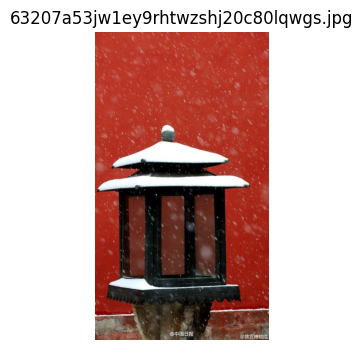

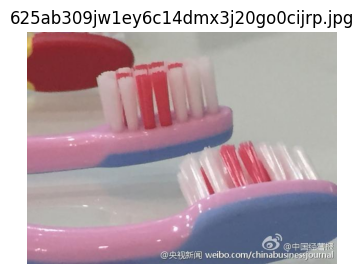

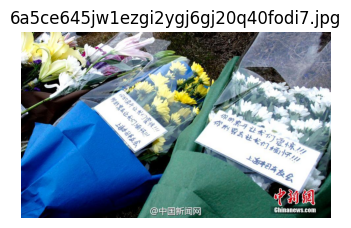

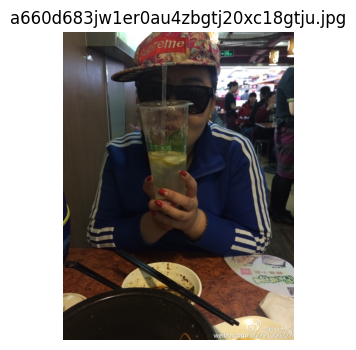

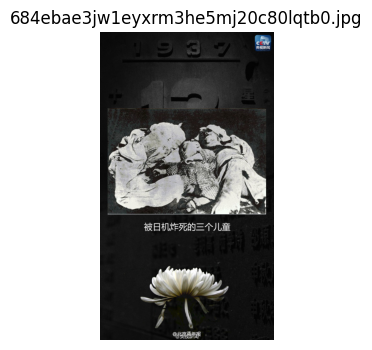

In [10]:
image_folder = '/root/.cache/kagglehub/datasets/siruitan/fakenewsproject/versions/12/image_dump/image_dump'
image_files = os.listdir(image_folder)
import matplotlib.pyplot as plt
from PIL import Image

# Show first 5 images
for filename in image_files[:5]:
    img_path = os.path.join(image_folder, filename)
    img = Image.open(img_path)

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')
    plt.show()

In [11]:
# Ensure the source folder exists
if not os.path.exists(image_folder):
    print(f"The source folder {image_folder} does not exist!")
    exit()

exist = main_df['image_path'].apply(
    lambda image_filename: os.path.exists(os.path.join(image_folder, image_filename)) if image_filename else False
)

main_df = main_df.loc[exist]

In [12]:
exist.value_counts()


,count
image_path,
True,14595
False,6


# Feature Engineering

Using device: cuda
Adding text length features...
Adding readability features...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/773 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaModel were not initialized from the model checkpoint at Peltarion/xlm-roberta-longformer-base-4096 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pytorch_model.bin:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

100%|██████████| 14595/14595 [07:28<00:00, 32.57it/s]


Adding language detection features...


100%|██████████| 14595/14595 [01:02<00:00, 232.86it/s]


Adding VADER sentiment features...


100%|██████████| 14595/14595 [02:52<00:00, 84.65it/s]


Processing date features...
Added date features from publish_date: year, month, day, day_of_week, quarter
Generating bert-base-multilingual-cased embeddings...


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Title column not found. Using only text for BERT embeddings.


Generating bert-base-multilingual-cased embeddings: 100%|██████████| 913/913 [04:48<00:00,  3.16it/s]


Added BERT embeddings with dimension 768 as a single column
Adding image features (per row)...


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 177MB/s]
Processing images row-wise:   0%|          | 0/14595 [00:00<?, ?it/s]

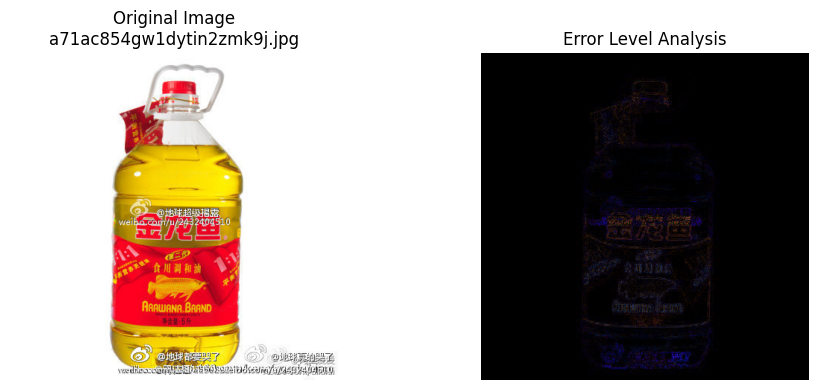

Processing images row-wise:   0%|          | 1/14595 [00:00<1:47:37,  2.26it/s]

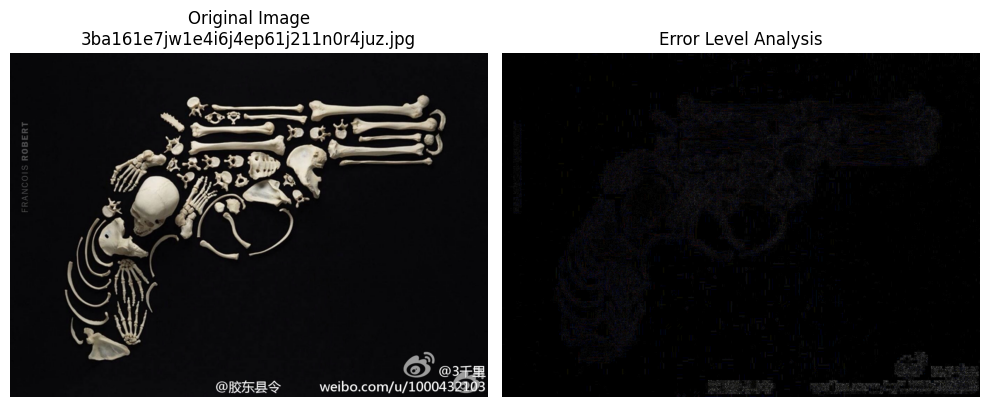

Processing images row-wise:  43%|████▎     | 6218/14595 [06:29<29:34,  4.72it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Processing images row-wise: 100%|██████████| 14595/14595 [23:15<00:00, 10.46it/s]

/root/.cache/kagglehub/datasets/siruitan/fakenewsproject/versions/12/image_dump/image_dump
Final DataFrame has 14595 rows and 47 columns.

BERT embedding example (first row):
Type: <class 'list'>
Length: 768
First 5 values: [0.03883169963955879, 0.09246552735567093, 0.42431190609931946, 0.1579057276248932, 0.3875921964645386]

CNN embedding example (first row):
Type: <class 'list'>
Length: 2048
First 5 values: [1.8053853511810303, 0.27462729811668396, 0.43493136763572693, 0.10423137247562408, 0.7868277430534363]


,domain,title,text,publish_date,image_path,score,label,translated_text,translation_status,translation_timestamp,...,publish_month,publish_day,publish_day_of_week,publish_quarter,bert_embeddings,cnn_embeddings,ela_mean,ela_std,ela_max,ela_entropy
0,weibo.com,NaN,震惊，转发求证：【想都不敢想 ，在美国一桶金龙鱼食用油只要8元人民币】 一桶食用油相当于中国...,2012-11-13 16:55:00,a71ac854gw1dytin2zmk9j.jpg,0,1,"Shocked, forwarded for verification: [I dare n...",success,2025-04-13 00:04:48,...,11,13,1,4,"[0.03883169963955879, 0.09246552735567093, 0.4...","[1.8053853511810303, 0.27462729811668396, 0.43...",2.767412,8.284231,255.0,193160.0
1,weibo.com,NaN,【法院无底线】湖南长沙一位小朋友上学路上捡到3万元，原地不动等失主，结果被人冒领。不知情的孩...,2013-05-09 17:36:00,3ba161e7jw1e4i6j4ep61j211n0r4juz.jpg,0,1,[The court has no bottom line] A child in Chan...,success,2025-04-13 00:04:48,...,5,9,3,2,"[-0.27227479219436646, -0.09592918306589127, 0...","[0.7978761196136475, 0.33946433663368225, 1.28...",3.260007,8.673647,255.0,1322480.0
2,weibo.com,NaN,"转发:我校需要小孩的衣服,新旧不限!西藏阿里地区是世界海拔最高的地区请问周围有没有四到十岁孩...",2015-10-17 23:18:00,006ajvCngw1ex4jjl2pwlj30c8096wf7.jpg,0,1,"Forward: Our school needs children's clothes, ...",success,2025-04-13 00:04:48,...,10,17,5,4,"[0.020140105858445168, -0.23938031494617462, 0...","[0.1567818522453308, 0.40951448678970337, 1.09...",12.947567,15.402728,255.0,145200.0
3,weibo.com,NaN,"立刻检查一下你家里的牙膏，如果是黑色条马上扔掉！ 大家买膏请留心,买牙膏时注意牙膏管反面 底...",2013-06-01 23:19:00,6112c76ajw1e591p39mpej20hw094mxh.jpg,0,1,"Check your toothpaste immediately, if it has a...",success,2025-04-13 00:04:48,...,6,1,5,2,"[0.08892631530761719, 0.09515045583248138, 0.6...","[0.6800677180290222, 1.3823773860931396, 0.133...",6.883805,11.827763,255.0,211232.0
4,weibo.com,NaN,快快转发，急急急！中央电视台《焦点访谈》已经播出，可口可乐承认旗下(果粒橙)含有美国禁用农药...,2013-03-08 19:35:00,a5404163jw1e2iljwbrztj.jpg,0,1,"Please forward this quickly, it's urgent! CCTV...",success,2025-04-13 00:04:48,...,3,8,4,1,"[-0.1634497046470642, 0.012963967397809029, 0....","[0.13245055079460144, 0.2840358018875122, 0.24...",10.303216,14.311365,255.0,76800.0


In [13]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import torch
from transformers import AutoModel, AutoTokenizer
from textstat import textstat
import re
from PIL import Image, ImageChops, ImageEnhance
from torchvision import models, transforms
from langdetect import detect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

class FeatureEngineering:
    """
    A comprehensive feature engineering class for fake news detection
    that extracts text features (length, readability, language, sentiment, and BERT embeddings)
    as well as image features (CNN embeddings and Error Level Analysis) from images.

    Modified to store BERT and CNN embeddings as single columns with list values.
    """
    def __init__(self, translated_text_col='translated_text', text_col='text', title_col='title', image_col='image_path'):
        self.translated_text_col = translated_text_col
        self.text_col = text_col
        self.title_col = title_col
        self.image_col = image_col

        # Initialize device and other components
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")
        self.sentiment_analyzer = SentimentIntensityAnalyzer()

        # Initialize image processing transform for CNN extraction
        self.image_transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    def add_text_length_features(self, df):
        """Add features related to text length."""
        print("Adding text length features...")
        result_df = df.copy()

        # Removed title_y_length feature

        result_df[f'{self.text_col}_length'] = result_df[self.text_col].apply(
            lambda x: len(str(x).split()) if isinstance(x, str) else 0
        )
        result_df[f'{self.text_col}_char_count'] = result_df[self.text_col].apply(
            lambda x: len(str(x)) if isinstance(x, str) else 0
        )
        result_df['avg_word_length'] = result_df[self.text_col].apply(
            lambda x: np.mean([len(w) for w in str(x).split()]) if isinstance(x, str) and len(str(x).split()) > 0 else 0
        )
        return result_df

    def add_readability_features(self, df, text_col='text'):
        """Add TRank readability score to the DataFrame in a single method."""
        print("Adding readability features...")

        # Define the TRank model
        BASE_MODEL = "Peltarion/xlm-roberta-longformer-base-4096"

        class ReadabilityModel(nn.Module, PyTorchModelHubMixin):
            def __init__(self, model_name=BASE_MODEL):
                super(ReadabilityModel, self).__init__()
                self.model = AutoModel.from_pretrained(model_name)
                self.drop = nn.Dropout(p=0.2)
                self.fc = nn.Linear(768, 1)

            def forward(self, ids, mask):
                out = self.model(input_ids=ids, attention_mask=mask, output_hidden_states=False)
                out = self.drop(out[1])
                outputs = self.fc(out)
                return outputs

        # Load the model and tokenizer
        model = ReadabilityModel.from_pretrained("trokhymovych/TRank_readability").to(self.device)
        tokenizer = AutoTokenizer.from_pretrained("trokhymovych/TRank_readability")
        model.eval()

        # Function to compute readability score for each text
        def compute_readability(text):
            if not isinstance(text, str) or not text.strip():
                return {'readability_score': 0}

            # Tokenize input text for TRank readability scoring
            inputs = tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=512,
                truncation=True,
                padding='max_length',
                return_tensors='pt'
            ).to(self.device)

            # Run inference to get the readability score
            with torch.no_grad():
                outputs = model(inputs['input_ids'], inputs['attention_mask'])
                readability_score = outputs.item()

            return {'readability_score': readability_score}

        tqdm.pandas()
        # Apply the compute_readability method to each text in the DataFrame
        readability_df = df[text_col].progress_apply(compute_readability).apply(pd.Series)

        # Merge readability scores back into the original DataFrame
        return pd.concat([df, readability_df], axis=1)

    def add_language_features(self, df):
        """Add language detection features."""
        print("Adding language detection features...")
        result_df = df.copy()
        tqdm.pandas()

        def detect_language(text):
            try:
                if not isinstance(text, str) or not text.strip():
                    return 'unknown'
                return detect(text)
            except:
                return 'unknown'

        result_df['language'] = result_df[self.text_col].progress_apply(detect_language)

        if len(result_df['language'].unique()) > 1:
            try:
                result_df = pd.get_dummies(result_df, columns=['language'], prefix='lang')
            except Exception as e:
                print(f"Error creating language one-hot encoding: {e}")

        return result_df

    def add_sentiment_features(self, df):
        """Add sentiment analysis features using VADER."""
        print("Adding VADER sentiment features...")
        result_df = df.copy()
        tqdm.pandas()

        def get_sentiment_scores(text):
            try:
                if not isinstance(text, str) or not text.strip():
                    return {'vader_neg': 0, 'vader_neu': 0, 'vader_pos': 0, 'vader_compound': 0}
                scores = self.sentiment_analyzer.polarity_scores(text)
                return {
                    'vader_neg': scores['neg'],
                    'vader_neu': scores['neu'],
                    'vader_pos': scores['pos'],
                    'vader_compound': scores['compound']
                }
            except Exception as e:
                print(f"Error processing text: {text[:50]}... | Error: {e}")
                return {'vader_neg': 0, 'vader_neu': 0, 'vader_pos': 0, 'vader_compound': 0}

        vader_df = result_df[self.translated_text_col].progress_apply(get_sentiment_scores).apply(pd.Series)
        return pd.concat([result_df, vader_df], axis=1)

    def add_bert_embeddings(self, df, model_name='bert-base-multilingual-cased', batch_size=16, max_length=512):
        """
        Extract BERT embeddings after combining title and text content (as a single list column).
        Combines the title and text before processing through BERT.
        """
        print(f"Generating {model_name} embeddings...")
        result_df = df.copy()
        try:
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            model = AutoModel.from_pretrained(model_name).to(self.device)
            model.eval()

            # Combine title and text for processing
            def combine_title_text(row):
                title = str(row[self.title_col]) if pd.notna(row.get(self.title_col, "")) else ""
                text = str(row[self.text_col]) if pd.notna(row[self.text_col]) else ""

                if title:
                    return title + " " + text
                return text

            # Create combined text column
            if self.title_col in result_df.columns:
                print("Combining title and text for BERT embeddings...")
                result_df['combined_text'] = result_df.apply(combine_title_text, axis=1)
            else:
                print("Title column not found. Using only text for BERT embeddings.")
                result_df['combined_text'] = result_df[self.text_col].apply(lambda x: str(x) if pd.notna(x) else "")

            all_embeddings = []
            with torch.no_grad():
                for i in tqdm(range(0, len(result_df), batch_size), desc=f"Generating {model_name} embeddings"):
                    batch_texts = result_df['combined_text'].iloc[i:i+batch_size].tolist()
                    batch_texts = [str(text) if text is not None else "" for text in batch_texts]
                    inputs = tokenizer(
                        batch_texts,
                        padding=True,
                        truncation=True,
                        max_length=max_length,
                        return_tensors="pt"
                    ).to(self.device)

                    outputs = model(**inputs)
                    # Mean pooling across the sequence
                    batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
                    all_embeddings.append(batch_embeddings)

            all_embeddings = np.vstack(all_embeddings)

            # Store embeddings as lists in a single column
            result_df['bert_embeddings'] = [emb.tolist() for emb in all_embeddings]

            # Clean up the temporary column
            result_df = result_df.drop('combined_text', axis=1)

            print(f"Added BERT embeddings with dimension {all_embeddings.shape[1]} as a single column")
        except Exception as e:
            print(f"Error generating BERT embeddings: {e}")
            print("Skipping BERT embeddings due to error")
            # Create empty embedding lists if failed
            result_df['bert_embeddings'] = [[] for _ in range(len(result_df))]

        return result_df

    def perform_ela(self, image_path, quality=90):
        """
        Performs Error Level Analysis (ELA) on an image.
        Args:
            image_path: Full path to the image file.
            quality: JPEG compression quality for recompression.
        Returns:
            A tuple (ela_image, features) where features is a dict of ELA metrics.
        """
        try:
            original = Image.open(image_path).convert('RGB')
            temp_path = os.path.join(os.path.dirname(image_path), "temp_ela.jpg")
            original.save(temp_path, "JPEG", quality=quality)

            recompressed = Image.open(temp_path).convert('RGB')
            ela_image = ImageChops.difference(original, recompressed)
            extrema = ela_image.getextrema()
            max_diff = max([ex[1] for ex in extrema])

            if max_diff == 0:
                ela_image = Image.new('RGB', original.size, (0, 0, 0))
                features = {'ela_mean': 0, 'ela_std': 0, 'ela_max': 0, 'ela_entropy': 0}
            else:
                scale = 255.0 / max_diff
                ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
                ela_array = np.array(ela_image)
                features = {
                    'ela_mean': float(np.mean(ela_array)),
                    'ela_std': float(np.std(ela_array)),
                    'ela_max': float(np.max(ela_array)),
                    'ela_entropy': float(np.mean([np.histogram(ela_array[:, :, c], bins=256)[0].sum()
                                                   for c in range(3)]))
                }
            os.remove(temp_path)
            return ela_image, features
        except Exception as e:
            print(f"Error in ELA processing for {image_path}: {e}")
            return Image.new('RGB', (224, 224), (0, 0, 0)), {'ela_mean': 0, 'ela_std': 0, 'ela_max': 0, 'ela_entropy': 0}

    def add_image_features_to_df(self, df, image_folder, visualize=False):
        """
        Process images on a per-row basis using the image_path column and append
        CNN features (as a single list column) and ELA features to the DataFrame.

        Args:
            df: DataFrame with an image_path column.
            visualize: If True, displays the original and ELA images for the first few rows.
        Returns:
            The original DataFrame with new columns for CNN and ELA image features.
        """
        print("Adding image features (per row)...")
        result_df = df.copy()

        # Define your base folder where images are stored.
        # if image_folder is None:
        #     image_folder = '/root/.cache/kagglehub/datasets/siruitan/fakenewsproject/versions/11/image_dump/image_dump'

        # Load the CNN model (ResNet-50 with the final classification layer removed)
        resnet = models.resnet50(weights='IMAGENET1K_V1')
        cnn_model = torch.nn.Sequential(*list(resnet.children())[:-1])
        cnn_model.eval()
        cnn_model = cnn_model.to(self.device)

        # Initialize lists to store features
        cnn_embeddings_list = []
        ela_features_list = []

        for idx, row in tqdm(result_df.iterrows(), total=result_df.shape[0],
                             desc="Processing images row-wise"):
            # Replace Windows backslashes with forward slashes and extract only the filename.
            filename = os.path.basename(row[self.image_col].replace('\\', '/'))
            image_path = os.path.join(image_folder, filename)

            # ELA features (dictionary)
            ela_features = {}

            try:
                if not os.path.exists(image_path):
                    print(f"Image file not found: {image_path}")
                    # Add empty list for CNN embeddings
                    cnn_embeddings_list.append([])
                    # Add NaN values for ELA features
                    ela_features = {'ela_mean': np.nan, 'ela_std': np.nan, 'ela_max': np.nan, 'ela_entropy': np.nan}
                else:
                    img = Image.open(image_path).convert('RGB')
                    img_tensor = self.image_transform(img).unsqueeze(0).to(self.device)

                    # Get CNN embeddings
                    with torch.no_grad():
                        embedding = cnn_model(img_tensor)

                    # Convert to list and store
                    embedding_list = embedding.squeeze().cpu().numpy().flatten().tolist()
                    cnn_embeddings_list.append(embedding_list)

                    # Get ELA features
                    ela_img, ela_features = self.perform_ela(image_path)

                    if visualize and idx < 2:
                        plt.figure(figsize=(10, 4))
                        plt.subplot(1, 2, 1)
                        plt.imshow(img)
                        plt.title(f"Original Image\n{filename}")
                        plt.axis('off')
                        plt.subplot(1, 2, 2)
                        plt.imshow(ela_img)
                        plt.title("Error Level Analysis")
                        plt.axis('off')
                        plt.tight_layout()
                        plt.show()
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
                cnn_embeddings_list.append([])
                ela_features = {'ela_mean': np.nan, 'ela_std': np.nan, 'ela_max': np.nan, 'ela_entropy': np.nan}

            ela_features_list.append(ela_features)

        # Add CNN embeddings as a single column
        result_df['cnn_embeddings'] = cnn_embeddings_list

        # Add ELA features as separate columns
        ela_df = pd.DataFrame(ela_features_list)
        final_df = pd.concat([result_df.reset_index(drop=True), ela_df.reset_index(drop=True)], axis=1)

        return final_df

    def add_date_features(self, df, date_col='publish_date'):
        """
        Extract features from date column: year, month, and day.
        If date column doesn't exist, returns df unchanged.
        """
        print("Processing date features...")
        result_df = df.copy()

        if date_col in result_df.columns:
            # Convert to datetime
            result_df[date_col] = pd.to_datetime(result_df[date_col], errors='coerce')

            # Extract numeric parts
            result_df['publish_year'] = result_df[date_col].dt.year.fillna(0).astype(int)
            result_df['publish_month'] = result_df[date_col].dt.month.fillna(0).astype(int)
            result_df['publish_day'] = result_df[date_col].dt.day.fillna(0).astype(int)

            # Add day of week (0=Monday, 6=Sunday)
            result_df['publish_day_of_week'] = result_df[date_col].dt.dayofweek.fillna(-1).astype(int)

            # Add quarter
            result_df['publish_quarter'] = result_df[date_col].dt.quarter.fillna(0).astype(int)

            print(f"Added date features from {date_col}: year, month, day, day_of_week, quarter")

            # Optionally remove the original date column if not needed
            # result_df.drop(columns=[date_col], inplace=True)
        else:
            print(f"Date column '{date_col}' not found. Skipping date features.")

        return result_df

    def process_all(self, df, image_folder, include_bert=True, visualize=False, date_col='publish_date'):
        """
        Apply all feature engineering steps to the DataFrame including:
         - Text-based features (length, readability, language, sentiment)
         - Date-based features (if date_col exists)
         - BERT embeddings (as a single list column)
         - CNN embeddings (as a single list column)
         - ELA image analysis features
        """
        result_df = df.copy()
        result_df = self.add_text_length_features(result_df)
        result_df = self.add_readability_features(result_df)
        result_df = self.add_language_features(result_df)
        result_df = self.add_sentiment_features(result_df)
        result_df = self.add_date_features(result_df, date_col)
        if include_bert:
            result_df = self.add_bert_embeddings(result_df)
        result_df = self.add_image_features_to_df(result_df, visualize=visualize, image_folder=image_folder)
        return result_df

# Initialize the feature engineering instance
feature_eng = FeatureEngineering(
    text_col='text',          # Column with main text content
    title_col='title_y',      # Column with the title (if available)
    image_col='image_path'    # Column containing the image file path
)

# Process all features, including row-wise image features
final_df = feature_eng.process_all(main_df, include_bert=True, image_folder=image_folder, visualize=True)
print(image_folder)
# Print shapes and sample columns for inspection
print(f"Final DataFrame has {final_df.shape[0]} rows and {final_df.shape[1]} columns.")

# Examine the embeddings
if 'bert_embeddings' in final_df.columns:
    print(f"\nBERT embedding example (first row):")
    print(f"Type: {type(final_df['bert_embeddings'].iloc[0])}")
    print(f"Length: {len(final_df['bert_embeddings'].iloc[0])}")
    print(f"First 5 values: {final_df['bert_embeddings'].iloc[0][:5]}")

if 'cnn_embeddings' in final_df.columns:
    print(f"\nCNN embedding example (first row):")
    print(f"Type: {type(final_df['cnn_embeddings'].iloc[0])}")
    print(f"Length: {len(final_df['cnn_embeddings'].iloc[0])}")
    print(f"First 5 values: {final_df['cnn_embeddings'].iloc[0][:5]}")

final_df.head()

In [14]:
final_df

,domain,title,text,publish_date,image_path,score,label,translated_text,translation_status,translation_timestamp,...,publish_month,publish_day,publish_day_of_week,publish_quarter,bert_embeddings,cnn_embeddings,ela_mean,ela_std,ela_max,ela_entropy
0,weibo.com,NaN,震惊，转发求证：【想都不敢想 ，在美国一桶金龙鱼食用油只要8元人民币】 一桶食用油相当于中国...,2012-11-13 16:55:00,a71ac854gw1dytin2zmk9j.jpg,0,1,"Shocked, forwarded for verification: [I dare n...",success,2025-04-13 00:04:48,...,11,13,1,4,"[0.03883169963955879, 0.09246552735567093, 0.4...","[1.8053853511810303, 0.27462729811668396, 0.43...",2.767412,8.284231,255.0,193160.0
1,weibo.com,NaN,【法院无底线】湖南长沙一位小朋友上学路上捡到3万元，原地不动等失主，结果被人冒领。不知情的孩...,2013-05-09 17:36:00,3ba161e7jw1e4i6j4ep61j211n0r4juz.jpg,0,1,[The court has no bottom line] A child in Chan...,success,2025-04-13 00:04:48,...,5,9,3,2,"[-0.27227479219436646, -0.09592918306589127, 0...","[0.7978761196136475, 0.33946433663368225, 1.28...",3.260007,8.673647,255.0,1322480.0
2,weibo.com,NaN,"转发:我校需要小孩的衣服,新旧不限!西藏阿里地区是世界海拔最高的地区请问周围有没有四到十岁孩...",2015-10-17 23:18:00,006ajvCngw1ex4jjl2pwlj30c8096wf7.jpg,0,1,"Forward: Our school needs children's clothes, ...",success,2025-04-13 00:04:48,...,10,17,5,4,"[0.020140105858445168, -0.23938031494617462, 0...","[0.1567818522453308, 0.40951448678970337, 1.09...",12.947567,15.402728,255.0,145200.0
3,weibo.com,NaN,"立刻检查一下你家里的牙膏，如果是黑色条马上扔掉！ 大家买膏请留心,买牙膏时注意牙膏管反面 底...",2013-06-01 23:19:00,6112c76ajw1e591p39mpej20hw094mxh.jpg,0,1,"Check your toothpaste immediately, if it has a...",success,2025-04-13 00:04:48,...,6,1,5,2,"[0.08892631530761719, 0.09515045583248138, 0.6...","[0.6800677180290222, 1.3823773860931396, 0.133...",6.883805,11.827763,255.0,211232.0
4,weibo.com,NaN,快快转发，急急急！中央电视台《焦点访谈》已经播出，可口可乐承认旗下(果粒橙)含有美国禁用农药...,2013-03-08 19:35:00,a5404163jw1e2iljwbrztj.jpg,0,1,"Please forward this quickly, it's urgent! CCTV...",success,2025-04-13 00:04:48,...,3,8,4,1,"[-0.1634497046470642, 0.012963967397809029, 0....","[0.13245055079460144, 0.2840358018875122, 0.24...",10.303216,14.311365,255.0,76800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14590,www.thrillist.com,"The 13 Most Tear-Jerking 'This Is Us' Moments,...",NBC NBC\n\nThis Is Us wrapped up its powerful ...,NaT,gossipcop-836336.jpg,0,0,NBC NBC\n\nThis Is Us wrapped up its powerful ...,NaN,NaN,...,0,0,-1,0,"[-0.3189462125301361, -0.18978151679039001, 0....","[0.5862293243408203, 0.4113011062145233, 1.446...",9.403508,11.250177,255.0,685800.0
14591,deadline.com,Lin-Manuel Miranda & James Corden Strip Down T...,Lin-Manuel Miranda and James Corden shed their...,NaT,gossipcop-874392.jpg,0,0,Lin-Manuel Miranda and James Corden shed their...,NaN,NaN,...,0,0,-1,0,"[-0.38549378514289856, 0.07734109461307526, -0...","[0.17358283698558807, 1.4765833616256714, 0.31...",12.040820,19.048243,255.0,470016.0
14592,www.thewrap.com,"Julia Louis-Dreyfus Thanks Katy Perry, Wraps 2...",Julia Louis-Dreyfus just wrapped her second ro...,NaT,gossipcop-888391.jpg,0,0,Julia Louis-Dreyfus just wrapped her second ro...,NaN,NaN,...,0,0,-1,0,"[-0.27139896154403687, -0.10181443393230438, -...","[0.07378670573234558, 1.4641143083572388, 0.96...",8.119966,9.450329,255.0,254616.0
14593,www.thewrap.com,Jimmy Kimmel Learns Secret of the ‘Whaboom’ Fr...,(Spoiler alert: Please do not read on if you h...,NaT,gossipcop-859228.jpg,0,0,(Spoiler alert: Please do not read on if you h...,NaN,NaN,...,0,0,-1,0,"[-0.3280586004257202, -0.13715910911560059, -0...","[0.5085525512695312, 1.9810030460357666, 0.494...",11.734850,13.481737,254.0,254616.0


In [15]:
from datetime import datetime
curr = datetime.now().strftime('%d_%m_%Y_%H%M')
drive.mount('/drive')
final_df.to_csv(f'/drive/MyDrive/BT4222/final_df_{curr}.csv')

Mounted at /drive
